# ANÁLISIS CLUSTER

## Realizado por: Pablo Sánchez Cabrera

Se cargan las librerías:

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist # para calcular la matriz de distancias
from scipy.cluster.hierarchy import linkage # para utilizar el método aglomerativo - matriz de enlace
from scipy.cluster.hierarchy import dendrogram # visualización del resultado del Cluster Jerárquico

from sklearn.cluster import KMeans # algoritmo no jerárquico muy común en problemas de aprendizaje no supervisado

Se cargan los datos de `USArrests`. Estos datos están ya disponibles en la librería **statsmodels**.

In [3]:
# cargar datos de trabajo
usa = sm.datasets.get_rdataset("USArrests", "datasets", cache=True).data
usa.head(10)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


## Cluster Jerárquico

Se obtiene la matriz de distancias usando la `distancia euclídea` y paar el cluster empleamos el método `average`.

In [5]:
dist=pdist(usa, metric='euclidean')
cluster=linkage(dist, method='average')

Finalmente, se pinta del dendograma

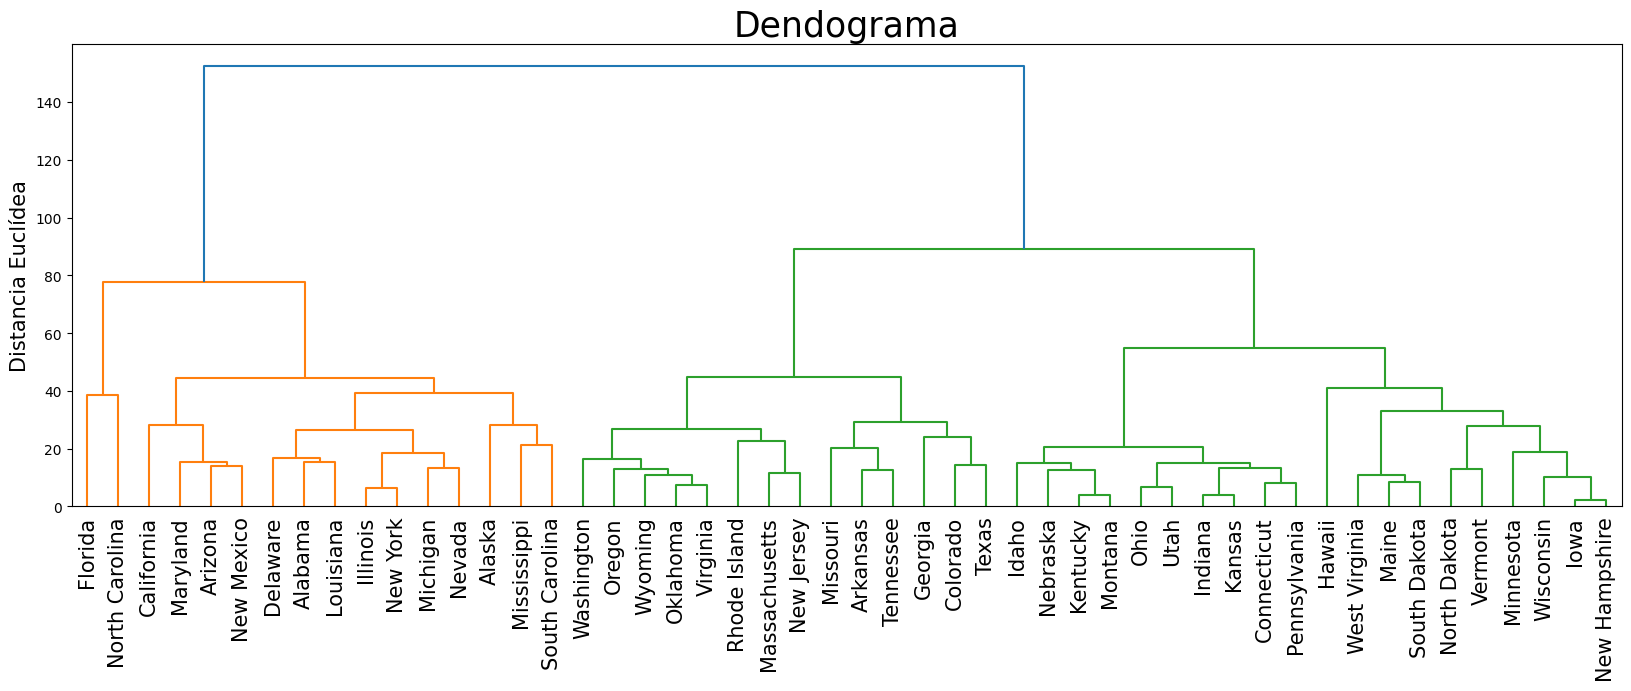

In [6]:
plt.figure(figsize=(20,6))
dendrograma = dendrogram(cluster, labels=usa.index, leaf_font_size=15)
plt.ylabel('Distancia Euclídea', fontsize=15)
plt.title('Dendograma', fontsize=25)
plt.show()

## Cluster no jerárquico

Este tipo de métodos tiene un inconveniente que es que el usuario tiene que elegir el número de clusters a priori. 
Como no lo conocecemos, empleamos el `criterio del codo` a partir del métrica `withniss` (suma de cuadrados entre conglomerados) para encontrar el número óptimo de grupos.

Para ilustrar el funcionamiento de un clustering no jerárquico empleamos el algoritmo **K-Means** por ser el más usual. 

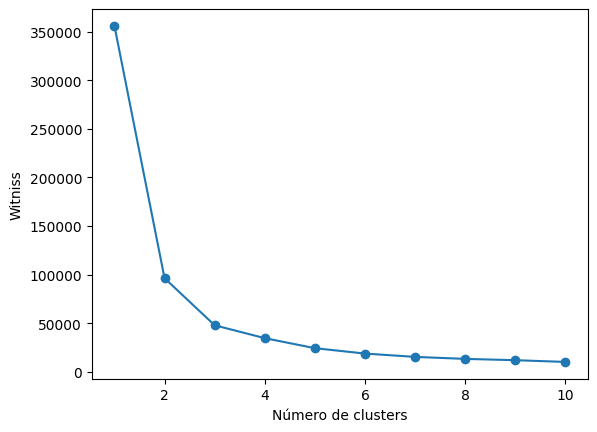

In [7]:
withniss=[]
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0) # definición del modelo
    kmeans.fit(usa) #aplicación a la muestra
    
    withniss.append(kmeans.inertia_)  # "inertia_" contiene el valor del SSE dentro del grupo (withniss)
    
# Visualización SSE dentro del grupo
plt.plot(range(1,11), withniss, marker='o') 
plt.xlabel('Número de clusters')
plt.ylabel('Witniss')
plt.show()

A partir del gráfico y siguiendo el criterio del codo, se eligen 5 grupos.

Se obtiene el modelo con el número de grupos prefijado.

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0) #definición del modelo
kmeans.fit(usa) # aplicación a la muestra

KMeans(n_clusters=5, n_init=10, random_state=0)

Finalmente, se obtienen los centroides de cada grupo así como las instancias identificadas en cada uno de los 5 grupos.

- `Coordenadas de los centroides`

In [9]:
pd.DataFrame(kmeans.cluster_centers_, columns=usa.columns) # se convierte a dataframe 

,Murder,Assault,UrbanPop,Rape
0,11.766667,257.916667,68.416667,28.933333
1,2.950000,62.700000,53.900000,11.510000
2,8.214286,173.285714,70.642857,22.842857
3,5.590000,112.400000,65.600000,17.270000
4,11.950000,316.500000,68.000000,26.700000


- `Instancias en cada grupo`

Como tenemos los índices y las etiquetas de los grupos se define un diccionario con:
- Clave: el nombre de los estados
- Valor: el id del cluster

In [36]:
paises_cluster = {}
for cluster, nombre in zip(kmeans.labels_, usa.index):
    paises_cluster[nombre] = cluster

Una vez se dispone del diccionario se convierte a dataframe

In [41]:
pd.DataFrame(paises_cluster, index=[0]).rename(index={0: "cluster"}).T

,cluster
Alabama,0
Alaska,0
Arizona,4
Arkansas,2
California,0
Colorado,2
Connecticut,3
Delaware,0
Florida,4
Georgia,2


Como las claves del diccionario son los estados es necesario hacer una transposición de la matriz (pues siempre se obtiene como columnas las claves del diccionario). 